# Instructions

We can skip the next cell if neural_de was installed from pip install.

In [10]:
import sys
sys.path.append("..")

Let's import from neural_de the brightness method

In [13]:
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
from random import randint
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from pathlib import Path
from neural_de.transformations.diffusion.diffusion_enhancer import DiffusionEnhancer
from neural_de.transformations.diffusion.diffpure_config import DiffPureConfig
import time

We load an example image

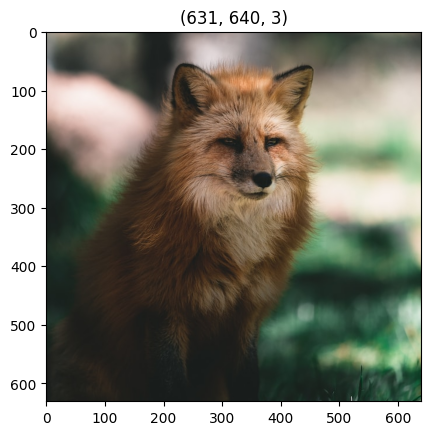

In [14]:
start=time.time()
input_path = Path('../examples/images/fox.jpg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image);

We select a region of this image (to see details), for exemple the head, to obtain an image 256x256.
You can use all size for your images, but the model is trained and is configured to compute with the size 256x256.

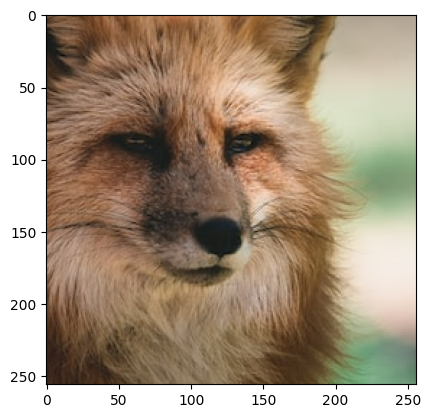

In [15]:
plt.imshow(image[100:356, 250:506]);

# Enhancing an image
We create an instance of DiffpurEnhancer

To start the process, you can modify the config parameters.
The most important are:
- t : number of times the diffusion model will clean the image per sample_step (150 by default).
- sample_step : number of steps we want the model computes the diffusion process (1 by default).
- t_delta : (15 by default)

Don't forget, il you have a gpu, select "cuda" in device parameter.

In the case where you have a gpu but it's full charged, you can run on your cpu with the following parameters:
- device = "cpu"
- config.use_fp16 = False

In [16]:
# Load ADVpurifier

#Initiate config
config= DiffPureConfig()
config.t = 150
config.t_delta = 15
config.sample_step = 1

#Select "cuda" for gpu ortherwise "cpu"
device = "cpu"

#Create instance of the diffusion model
purifier = DiffusionEnhancer(device=device, config=config)

[03-19 17:32:00] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\utils\twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-19 17:32:00] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\utils\model_manager.py:65} INFO - Model 256x256_diffusion_uncond.pt not found locally or corrupted, downloading it from server
Required pretrain model for  diffpure  enchancer is not present in local cache, downloading it . . .
[03-19 17:32:55] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\utils\model_manager.py:103} INFO - Model downloaded and validated
Pretrained model has been downloaded in cache
[03-19 17:32:55] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\transformations\diffusion\rev_guided_diffusion.py:30} INFO - Building DiffPure model
[03-19 17:32:55] {C:\SAUVEGARDES_FIN_CON

We generate some noise on the image

In [17]:
mean = 0
sigma = 20
gaussian = np.random.normal(mean, sigma, image.shape)
noisy_image = np.zeros(image.shape, np.float32)
noisy_image = image + gaussian
noisy_image[noisy_image > 255] = 255
noisy_image[noisy_image < 0] = 0
noisy_image = noisy_image.astype(np.uint8)

In [18]:
#Apply the transform method to compute the purified image
#tensor = torch.Tensor([noisy_image[100:356, 250:506]]).permute(0, -1, -3, -2) /255
#purified = purifier.transform(tensor).permute(0, 2, 3, 1).cpu().detach().numpy()[0]
purified = purifier.transform([noisy_image[100:356, 250:506]])


KeyboardInterrupt



In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title("Noisy image")
plt.imshow(noisy_image[100:356, 250:506])
plt.subplot(1,3,2)
plt.title("Purified image")
plt.imshow(purified[0])
plt.subplot(1,3,3)
plt.title("Original image")
plt.imshow(image[100:356, 250:506])
plt.show();

As we can see, our image is purified ! The noise pixels are attenuated.
It should also be noted that the purification of the images is one property of this model.
The other property is important, this model is resistant to the noise attacks.

# Second test
We can load another test with more steps to improve the result.

In [ ]:
#Initiate config
config2= DiffPureConfig()
config2.t = 150
config2.t_delta = 15
config2.sample_step = 7

#Select "cuda" for gpu ortherwise "cpu"
device = "cpu"

#Create instance of the diffusion model
purifier2 = DiffusionEnhancer(device=device, config=config2)

In [ ]:
#mean = 0
#sigma = 20
#gaussian = np.random.normal(mean, sigma, image.shape)
noisy_image2 = np.zeros(image.shape, np.float32)
noisy_image2 = image + gaussian
noisy_image2[noisy_image2 > 255] = 255
noisy_image2[noisy_image2 < 0] = 0
noisy_image2 = noisy_image2.astype(np.uint8)

In [ ]:
purified2 = purifier2.transform([noisy_image2[100:356, 250:506]])

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title("Noisy image")
plt.imshow(noisy_image2[100:356, 250:506])
plt.subplot(1,3,2)
plt.title("Purified image")
plt.imshow(purified2[0])
plt.subplot(1,3,3)
plt.title("Original image")
plt.imshow(image[100:356, 250:506])
plt.show();

In [ ]:
end=time.time()
print("temps final : ",end-start)